In [2]:
import json
import pandas as pd

In [134]:
# functions

def defineConfusionMatrix(bot_graphs, exemplar_links, want_failed_bots = False):
    '''
    Function to calculate the True Positive (tp), False Positive (fp), and False Negative (fn) values.
    
    inputs:
        bot_graphs: A list of dictionaries that represent each graph. The ouput of getUniqueGraphs().
        exemplar_links: A list of dictionaries that represent each graph. The ouput of getFormattedBotGraphs().
    
    returns: 
        tp: an integer for the true positives
        fp: an integer for the false positives
        fn: an integer for the false negatives
        bot_failed_attempts: a list of dictionaries for each graph not found in the exemplar data set
    
    
    '''
    #creating a list of the links found in the exemplar dataset
    exemplar_link_list = [i['graph_link'] for i in exemplar_links]
    
    # list to identify any failed attempts
    bot_failed_attempts = [] 
    
    # setting values for the true positives, false positives, and false negatives
    tp = 0   
    fp = 0 
    fn = 0 
    
    
    for graph in bot_graphs:
        
        # looking at each uri from the storygraphbot ouput and seeing that it is in the exemplar data set
        if graph['graph_link'] in exemplar_link_list:
            
            # finding the index where the uri is found in the exemplar data set
            idx = exemplar_link_list.index(graph['graph_link']) 
    
            # checking that the degrees of the connected components match where the uri of each matched
            # the degree of the storygraphbot output is rounded to 2 decimals because it is a long decimal while
            # the exemplar is only 2 digits
            
            
            if (round(graph['cc_degree'], 2)) == (exemplar_links[idx]['cc_degree']) and (graph['cc_index'] == (exemplar_links[idx]['cc_index'] - 1)): 
                
                tp += 1

            else:
                
                # adding to false postive when the storygraphbot output has the correct graph uri but the wrong connected component degree
                fp += 1
                bot_failed_attempts.append(graph)
       
        else:
            # adding to the false positive when the storygraphbot ouput uri is not found in the exemplar
            fp += 1
            bot_failed_attempts.append(graph)
    
    # bot links is a link of uri's ouputed by the storygraphbot algoirthm
    bot_links = [bot_graphs[i]['graph_link'] for i in range(len(bot_graphs))]
    
    #looking at each link in the exemplar links
    for link in exemplar_link_list:
        
        if link not in bot_links:
            # adding to the false negative because a link in the exemplar is not found in the storygraphbot output
            fn += 1
            
    if want_failed_bots == True:
        return tp, fp, fn, bot_failed_attempts
    else:
        return tp, fp, fn


def getFormattedBotGraphs(unique_graphs):
    '''
    A function that transforms the storygraph bot format to the exemplar format for direct comparison
    
    inputs:
        unique_graphs: A list of dictionaries that each represent a graph in the storygraphbot format.
        
    outputs:
        bot_graphs: A list of dictionaries that each represent a graph in the exemplar format.
    '''
    
    # list to append the dictionary to
    bot_graphs = []
    
    for graph in unique_graphs:
        # creating a dictionary for the new formating
        graph_dic = {'graph_link': '', 'cc_degree': '', 'cc_index': ''} 
        
        # transforming the graph link from the internet archive format to the csu format
        intermediate = (graph['graph_uri']
                                   .replace('https://web.archive.org/storygraph/graphs/usa/', 'https://storygraph.cs.odu.edu/graphs/polar-media-consensus-graph/')
                                   .replace('hist=144', 'hist=1440'))
        graph_dic['graph_link'] = (intermediate
                                   .replace(intermediate[65:87], '')
                                   .replace('&cursor', '#cursor') + intermediate[65:87].replace('#t=', '&t='))

        # storing the connected component degree
        graph_dic['cc_degree'] = graph['avg_degree'] 
        
        # storing the uri with the most edges in the connected component
        graph_dic['cc_index'] = graph['index'] 
        
        bot_graphs.append(graph_dic)
        
    return bot_graphs

def getScores(tp, fp, fn):
    '''
    tp = True Positive
    fp = False Positive
    fn = False Negatives
    
    return: percision, recall, f1-score
    '''
    # calculating the precision, recall, and f1-score
    
    precision = ((tp)/(tp + fp))
    recall = ((tp)/(tp+fn))
    f1 = 2 *((precision * recall) / (precision + recall))
    return precision, recall, f1

# Testing The New Method

## Story 1: Spending Deal

In [167]:
# examining story 1
f = open('new_algorithm/data/65/story_1/story_1_test_pt_1.json', encoding = 'UTF-8')
story_1_1 = json.load(f)
f.close()

f = open('new_algorithm/data/65/story_1/story_1_test_pt_2.json', encoding = 'UTF-8')
story_1_2 = json.load(f)
f.close()

#load exemplar
f = open('data/exemplar_dataset.json')
exemplar = json.load(f)
f.close()

exemplar_links = exemplar[1]['links']

In [168]:
story_1_cc = story_1_1['story_vectors'][1]['con_comps'] + story_1_2['story_vectors'][0]['con_comps']

In [169]:
bot_graphs = getFormattedBotGraphs(story_1_cc)

In [170]:
tp, fp, fn, failed_bots = defineConfusionMatrix(bot_graphs, exemplar_links, want_failed_bots = True)

In [171]:
precision, recall, f1 = getScores(tp, fp, fn)

In [172]:
saved_data = []

In [173]:
story_dic = {'story_index': 1, 'precision': precision, 'recall': recall, 'f1': f1}
saved_data.append(story_dic)

In [174]:
story_dic

{'story_index': 1,
 'precision': 0.09919028340080972,
 'recall': 1.0,
 'f1': 0.18047882136279925}

## Story 2: Scott Pruit

In [175]:
# examining story 2
f = open('new_algorithm/data/65/story_2/story_2_pt_1.json', encoding = 'UTF-8')
story_2_1 = json.load(f)
f.close()

f = open('new_algorithm/data/65/story_2/story_2_pt_2.json', encoding = 'UTF-8')
story_2_2 = json.load(f)
f.close()

#load exemplar
f = open('data/exemplar_dataset.json')
exemplar = json.load(f)
f.close()

exemplar_links = exemplar[2]['links']

In [176]:
story_2_cc = story_2_1['story_vectors'][0]['con_comps'] + story_2_2['story_vectors'][5]['con_comps']
bot_graphs = getFormattedBotGraphs(story_2_cc)
tp, fp, fn, failed_bots = defineConfusionMatrix(bot_graphs, exemplar_links, want_failed_bots = True)

In [177]:
precision, recall, f1 = getScores(tp, fp, fn)

story_dic = {'story_index': 2, 'precision': precision, 'recall': recall, 'f1': f1}
saved_data.append(story_dic)

In [178]:
story_dic

{'story_index': 2,
 'precision': 0.14501510574018128,
 'recall': 0.7868852459016393,
 'f1': 0.2448979591836735}

## Story 3: Pittsburgh Synagogue

In [179]:
# examining story 3
f = open('new_algorithm/data/65/story_3/story_3_pt_1.json', encoding = 'UTF-8')
story_3_1 = json.load(f)
f.close()

f = open('new_algorithm/data/65/story_3/story_3_pt_2.json', encoding = 'UTF-8')
story_3_2 = json.load(f)
f.close()

f = open('new_algorithm/data/65/story_3/story_3_pt_3.json', encoding = 'UTF-8')
story_3_3 = json.load(f)
f.close()

#load exemplar
f = open('data/exemplar_dataset.json')
exemplar = json.load(f)
f.close()

exemplar_links = exemplar[3]['links']

In [180]:
story_3_cc = story_3_1['story_vectors'][0]['con_comps'] + story_3_2['story_vectors'][0]['con_comps'] + story_3_3['story_vectors'][0]['con_comps']
bot_graphs = getFormattedBotGraphs(story_3_cc)
tp, fp, fn, failed_bots = defineConfusionMatrix(bot_graphs, exemplar_links, want_failed_bots = True)

In [181]:
precision, recall, f1 = getScores(tp, fp, fn)

story_dic = {'story_index': 3, 'precision': precision, 'recall': recall, 'f1': f1}
saved_data.append(story_dic)

In [182]:
story_dic

{'story_index': 3,
 'precision': 0.3670557717250324,
 'recall': 1.0,
 'f1': 0.5370018975332068}

## Story 4: Vote to End Yeman War

In [184]:
# examining story 4
f = open('new_algorithm/data/65/story_4/story_4_pt_1.json', encoding = 'UTF-8')
story_4_1 = json.load(f)
f.close()

f = open('new_algorithm/data/65/story_4/story_4_pt_2.json', encoding = 'UTF-8')
story_4_2 = json.load(f)
f.close()

#load exemplar
f = open('data/exemplar_dataset.json')
exemplar = json.load(f)
f.close()

exemplar_links = exemplar[4]['links']

story_4_cc = story_4_1['story_vectors'][2]['con_comps'] + story_4_2['story_vectors'][5]['con_comps']
bot_graphs = getFormattedBotGraphs(story_4_cc)
tp, fp, fn, failed_bots = defineConfusionMatrix(bot_graphs, exemplar_links, want_failed_bots = True)

precision, recall, f1 = getScores(tp, fp, fn)

story_dic = {'story_index': 4, 'precision': precision, 'recall': recall, 'f1': f1}
saved_data.append(story_dic)

In [185]:
story_dic

{'story_index': 4,
 'precision': 0.0913312693498452,
 'recall': 1.0,
 'f1': 0.16737588652482271}

## Story 5: George Bush Sr. Dies

In [ ]:
# Can't Look at this one yet, there was a memory error on the first day

## Story 8: Aurora Illinois Shooting

In [187]:
# examining story 5
f = open('new_algorithm/data/65/story_8/story_8_pt_1.json', encoding = 'UTF-8')
story_8_1 = json.load(f)
f.close()

#don't need this one because the first part contiained the full story
#f = open('new_algorithm/data/65/story_5/story_5_pt_2.json', encoding = 'UTF-8')
#story_5_2 = json.load(f)
#f.close()

#load exemplar
f = open('data/exemplar_dataset.json')
exemplar = json.load(f)
f.close()

exemplar_links = exemplar[8]['links']

story_8_cc = story_8_1['story_vectors'][0]['con_comps'] 
bot_graphs = getFormattedBotGraphs(story_8_cc)
tp, fp, fn, failed_bots = defineConfusionMatrix(bot_graphs, exemplar_links, want_failed_bots = True)

precision, recall, f1 = getScores(tp, fp, fn)

story_dic = {'story_index': 8, 'precision': precision, 'recall': recall, 'f1': f1}
saved_data.append(story_dic)

In [191]:
saved_data[4]['story_index'] = 8

In [192]:
saved_data

[{'story_index': 1,
  'precision': 0.09919028340080972,
  'recall': 1.0,
  'f1': 0.18047882136279925},
 {'story_index': 2,
  'precision': 0.14501510574018128,
  'recall': 0.7868852459016393,
  'f1': 0.2448979591836735},
 {'story_index': 3,
  'precision': 0.3670557717250324,
  'recall': 1.0,
  'f1': 0.5370018975332068},
 {'story_index': 4,
  'precision': 0.0913312693498452,
  'recall': 1.0,
  'f1': 0.16737588652482271},
 {'story_index': 8,
  'precision': 0.43119266055045874,
  'recall': 1.0,
  'f1': 0.6025641025641025}]

## Story 9: AOC Town Hall

In [193]:
f = open('new_algorithm/data/65/story_9/story_9.json', encoding = 'UTF-8')
story_9_1 = json.load(f)
f.close()

f = open('data/exemplar_dataset.json')
exemplar = json.load(f)
f.close()

exemplar_links = exemplar[9]['links']

story_9_cc = story_9_1['story_vectors'][1]['con_comps'] 
bot_graphs = getFormattedBotGraphs(story_9_cc)
tp, fp, fn, failed_bots = defineConfusionMatrix(bot_graphs, exemplar_links, want_failed_bots = True)

precision, recall, f1 = getScores(tp, fp, fn)

story_dic = {'story_index': 9, 'precision': precision, 'recall': recall, 'f1': f1}
saved_data.append(story_dic)

In [194]:
story_dic

{'story_index': 9,
 'precision': 0.19402985074626866,
 'recall': 0.7558139534883721,
 'f1': 0.3087885985748218}

## Story 11: John Lewis Pancreatic Cancer

In [195]:
f = open('new_algorithm/data/65/story_11/story_11_pt_1.json', encoding = 'UTF-8')
story_11_1 = json.load(f)
f.close()

f = open('new_algorithm/data/65/story_11/story_11_pt_2.json', encoding = 'UTF-8')
story_11_2 = json.load(f)
f.close()

f = open('data/exemplar_dataset.json')
exemplar = json.load(f)
f.close()

exemplar_links = exemplar[11]['links']

story_11_cc = story_11_1['story_vectors'][0]['con_comps'] + story_11_2['story_vectors'][2]['con_comps'] 
bot_graphs = getFormattedBotGraphs(story_11_cc)
tp, fp, fn, failed_bots = defineConfusionMatrix(bot_graphs, exemplar_links, want_failed_bots = True)

precision, recall, f1 = getScores(tp, fp, fn)

story_dic = {'story_index': 11, 'precision': precision, 'recall': recall, 'f1': f1}
saved_data.append(story_dic)

In [196]:
story_dic

{'story_index': 11,
 'precision': 0.11347517730496454,
 'recall': 1.0,
 'f1': 0.20382165605095542}

## Story 16: Trump Signs Covid Relief Bill

In [198]:
f = open('new_algorithm/data/65/story_16/story_16_pt_1.json', encoding = 'UTF-8')
story_16_1 = json.load(f)
f.close()

f = open('data/exemplar_dataset.json')
exemplar = json.load(f)
f.close()

exemplar_links = exemplar[16]['links']

story_16_cc = story_16_1['story_vectors'][1]['con_comps']
bot_graphs = getFormattedBotGraphs(story_16_cc)
tp, fp, fn, failed_bots = defineConfusionMatrix(bot_graphs, exemplar_links, want_failed_bots = True)

precision, recall, f1 = getScores(tp, fp, fn)

story_dic = {'story_index': 16, 'precision': precision, 'recall': recall, 'f1': f1}
saved_data.append(story_dic)

In [199]:
story_dic

{'story_index': 16,
 'precision': 0.30094043887147337,
 'recall': 0.8135593220338984,
 'f1': 0.4393592677345538}

## Story 17: John Lewis Dies

In [200]:
f = open('new_algorithm/data/65/story_17/story_17_pt_1.json', encoding = 'UTF-8')
story_17_1 = json.load(f)
f.close()

f = open('new_algorithm/data/65/story_17/story_17_pt_2.json', encoding = 'UTF-8')
story_17_2 = json.load(f)
f.close()

f = open('data/exemplar_dataset.json')
exemplar = json.load(f)
f.close()

exemplar_links = exemplar[17]['links']

story_17_cc = story_17_1['story_vectors'][3]['con_comps'] + story_17_2['story_vectors'][1]['con_comps']
bot_graphs = getFormattedBotGraphs(story_17_cc)
tp, fp, fn, failed_bots = defineConfusionMatrix(bot_graphs, exemplar_links, want_failed_bots = True)

precision, recall, f1 = getScores(tp, fp, fn)

story_dic = {'story_index': 17, 'precision': precision, 'recall': recall, 'f1': f1}
saved_data.append(story_dic)

In [201]:
story_dic

{'story_index': 17,
 'precision': 0.6104294478527608,
 'recall': 0.995,
 'f1': 0.7566539923954373}

## Story 19: ASAP Rocky

In [202]:
f = open('new_algorithm/data/65/story_19/story_19_pt_1.json', encoding = 'UTF-8')
story_19_1 = json.load(f)
f.close()

f = open('data/exemplar_dataset.json')
exemplar = json.load(f)
f.close()

exemplar_links = exemplar[19]['links']

story_19_cc = story_19_1['story_vectors'][0]['con_comps']
bot_graphs = getFormattedBotGraphs(story_19_cc)
tp, fp, fn, failed_bots = defineConfusionMatrix(bot_graphs, exemplar_links, want_failed_bots = True)

precision, recall, f1 = getScores(tp, fp, fn)

story_dic = {'story_index': 19, 'precision': precision, 'recall': recall, 'f1': f1}
saved_data.append(story_dic)

In [203]:
story_dic

{'story_index': 19,
 'precision': 0.10284463894967177,
 'recall': 1.0,
 'f1': 0.1865079365079365}

In [204]:
saved_data

[{'story_index': 1,
  'precision': 0.09919028340080972,
  'recall': 1.0,
  'f1': 0.18047882136279925},
 {'story_index': 2,
  'precision': 0.14501510574018128,
  'recall': 0.7868852459016393,
  'f1': 0.2448979591836735},
 {'story_index': 3,
  'precision': 0.3670557717250324,
  'recall': 1.0,
  'f1': 0.5370018975332068},
 {'story_index': 4,
  'precision': 0.0913312693498452,
  'recall': 1.0,
  'f1': 0.16737588652482271},
 {'story_index': 8,
  'precision': 0.43119266055045874,
  'recall': 1.0,
  'f1': 0.6025641025641025},
 {'story_index': 9,
  'precision': 0.19402985074626866,
  'recall': 0.7558139534883721,
  'f1': 0.3087885985748218},
 {'story_index': 11,
  'precision': 0.11347517730496454,
  'recall': 1.0,
  'f1': 0.20382165605095542},
 {'story_index': 16,
  'precision': 0.30094043887147337,
  'recall': 0.8135593220338984,
  'f1': 0.4393592677345538},
 {'story_index': 17,
  'precision': 0.6104294478527608,
  'recall': 0.995,
  'f1': 0.7566539923954373},
 {'story_index': 19,
  'precisio

In [205]:
data = pd.DataFrame.from_dict(saved_data)

In [209]:
data.to_csv('new_algorithm/data/65/saved_results.csv')

<AxesSubplot:>

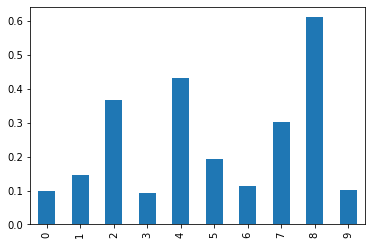

In [211]:
data['precision'].plot(kind = 'bar')

<AxesSubplot:>

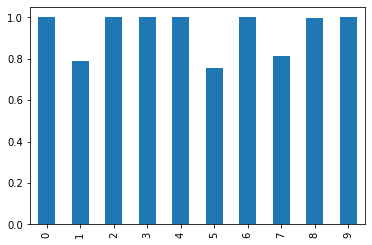

In [212]:
data['recall'].plot(kind = 'bar')

<AxesSubplot:>

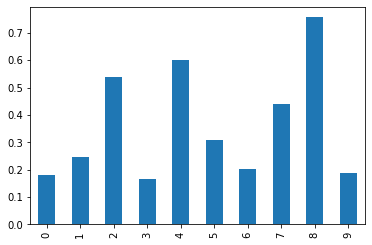

In [213]:
data['f1'].plot(kind = 'bar')